##Stroke Prediction Classification

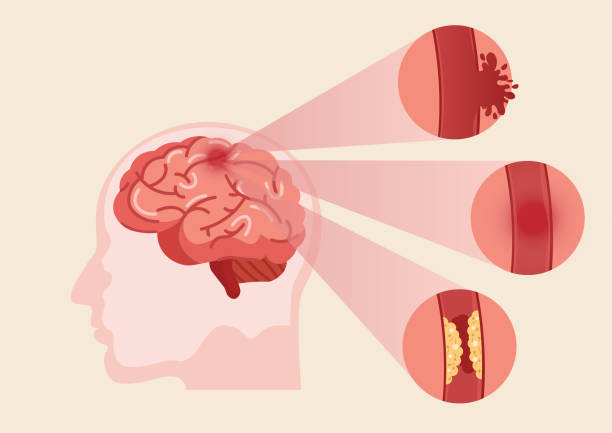

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

##Imports

In [1]:
#basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Stroke/healthcare-dataset-stroke-data.csv')
df1 = df.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Clean data

In [3]:
df.shape

(5110, 12)

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# filled missing bmi with average
df.fillna({"bmi":df['bmi'].mean().round(1)}, inplace=True)
df['bmi'].head()

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [9]:
# drop 1 patient with "other" *for data purposes*
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
print(df[df['gender']=='Other'].index.values)

[3116]


In [11]:
df = df.drop(3116)
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [12]:
#save clean data
#from google.colab import files
#df.to_csv('stroke_clean.csv', encoding = 'utf-8-sig')
#files.download('stroke_clean.csv')

In [13]:
print(df['stroke'].value_counts())

0    4860
1     249
Name: stroke, dtype: int64


##EDA

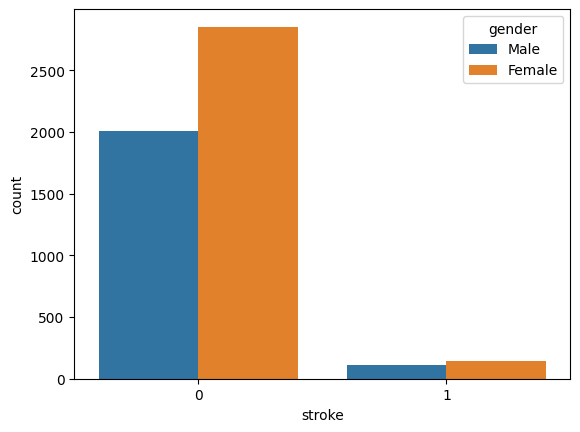

In [101]:
sns.countplot(x='stroke', hue='gender', data=df)
plt.show()

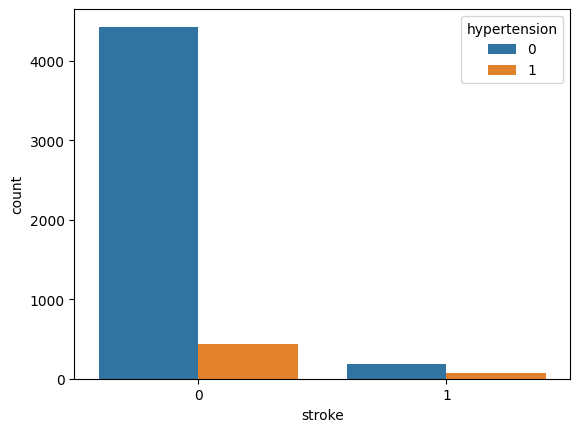

In [102]:
sns.countplot(x='stroke', hue='hypertension', data=df)
plt.show()

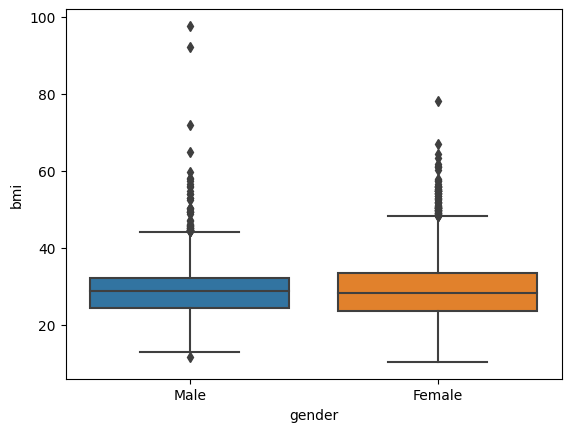

In [103]:
sns.boxplot(x='gender', y='bmi', data=df)
plt.show()

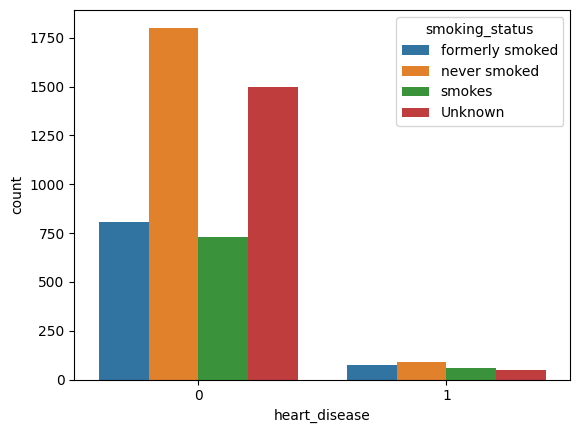

In [104]:
sns.countplot(x='heart_disease', hue='smoking_status', data=df)
plt.show()

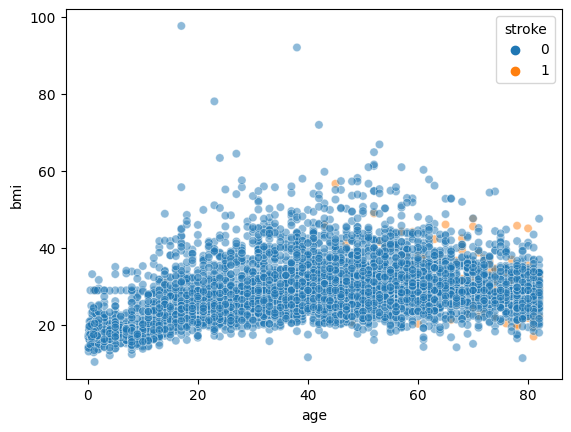

In [105]:
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, alpha=0.5)
plt.show()

data is imbalanced and will need fixing using SMOTE

##Data Encoding

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# imports for data encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [17]:
X = df.iloc[:, 0:11].values
y = df.iloc[:, -1].values

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,6,7,10])], remainder='passthrough')
X = ct.fit_transform(X)

##Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Solve Imbalance using SMOTE

In [21]:
print("Before SMOTE - Class 0:", np.sum(y_train == 0), "Class 1:", np.sum(y_train == 1))

Before SMOTE - Class 0: 3662 Class 1: 169


In [22]:
#fix imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [23]:
print("After SMOTE - Class 0:", np.sum(y_train_resampled == 0), "Class 1:", np.sum(y_train_resampled == 1))

After SMOTE - Class 0: 3662 Class 1: 3662


## XGBoost Model

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier

In [25]:
classifier = XGBClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1182   16]
 [  78    2]]


0.9264475743348983

- True Positive (TP): 2
- False Positive (FP): 16
- True Negative (TN): 1182
- False Negative (FN): 78

- XGBClassifier correctly predicted the positive class (True Positives): 2 instances.
- XGBClassifier incorrectly predicted the positive class when it was actually negative (False Positives): 16 instances.
- XGBClassifier correctly predicted the negative class (True Negatives): 1182 instances.
- XGBClassifier incorrectly predicted the negative class when it was actually positive (False Negatives): 78 instances.

##RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[1188   10]
 [  76    4]]


0.9327073552425665

- True Positive (TP): 4
- False Positive (FP): 10
- True Negative (TN): 1188
- False Negative (FN): 76

- Random Forest correctly predicted the positive class (True Positives): 4 instances.
- Random Forest incorrectly predicted the positive class when it was actually negative (False Positives): 10 instances.
- Random Forest correctly predicted the negative class (True Negatives): 1188 instances.
- Random Forest incorrectly predicted the negative class when it was actually positive (False Negatives): 76 instances.

##Summary

In [99]:
from sklearn.metrics import classification_report

In [36]:
#XGBoost
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.11      0.03      0.04        80

    accuracy                           0.93      1278
   macro avg       0.52      0.51      0.50      1278
weighted avg       0.89      0.93      0.90      1278



In [37]:
#RandomForest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.29      0.05      0.09        80

    accuracy                           0.93      1278
   macro avg       0.61      0.52      0.53      1278
weighted avg       0.90      0.93      0.91      1278



Random Forest:

- Higher precision, recall, and F1-score for Class 1 compared to XGBoost.
- Class 0 has high precision, recall, and F1-score.
- Overall accuracy is 0.93.

XGBoost:

- Similar overall accuracy (0.93) as Random Forest.
- Class 0 has high precision, recall, and F1-score.
- Class 1 has lower precision, recall, and F1-score compared to Confusion Matrix 1.

#Discussion

Both models have similar overall accuracy, but RandomForest performs better for Class 1 with higher precision, recall, and F1-score.
XGBoost has lower performance for Class 1, with lower precision, recall, and F1-score.